[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jaguzmano09/Procesamiento-Digital-de-Senales-JGLO/blob/main/Actividad%202%20-%20Filtro%20de%20Arm%C3%B3nicos/Actividad_2_PDS.ipynb)

# **Actividad 2: Filtro de Armónicos y generador de ecualizador**

**Universidad Nacional de Colombia - Sede Manizales**  
**Procesamiento Digital de Señales**

---

- **Presentado por:**  
  Javier Leonardo Guzmán Olaya  
  *C.C. 1108998026*



# **Filtro de armónicos**

La actividad realizada consiste en lo siguiente:
- Se genera una señal con 10 frecuencias fundamentales.
- Una vez creada la señal, se adiciona un ruido.
- Calculo de la transformada rápida de Fourier (FFT).
- Calculo la inversa de Fourier (iFFT).
- Aplicación de un filtro de armónicos

## Generación de una señal con 10 frecuencias fundamentales: 

Se generó una señal compuesta por una suma de 10 componentes sinusoidales con diferentes frecuencias fundamentales.

In [31]:
# Se importan las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

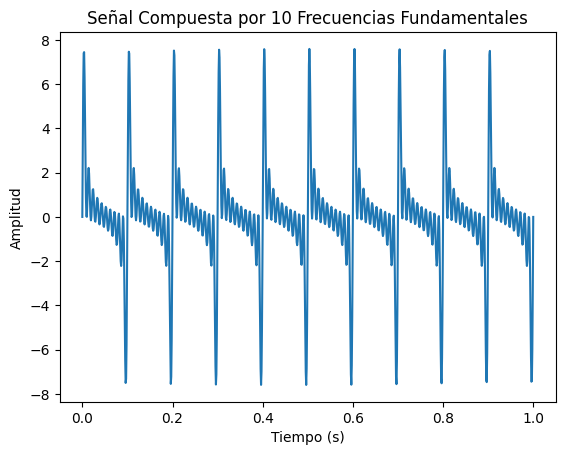

In [32]:
# Se crea la señal con 10 frecuencias de muestreo

# Tiempo de muestreo
t = np.linspace(0, 1, 1000)

# Se definen la 10 frecuencias de la señal
frecuencias = [10,20,30,40,50,60,70,80,90,100]

# Se genera la señal
sen = sum(np.sin(2 * np.pi * f * t) for f in frecuencias)

# Se realiza el gráfico de la señal
plt.plot(t, sen)
plt.title('Señal Compuesta por 10 Frecuencias Fundamentales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

## Adición de ruido a la señal

A la señal generada se le añade un ruido blanco gaussiano (RGB) de 0.5, con el fin de simular un entorno más realista.

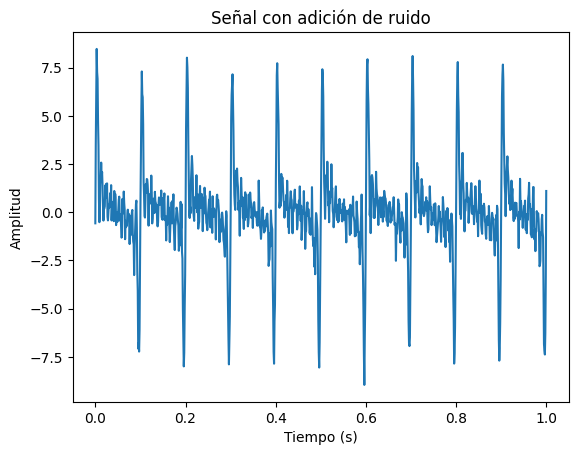

In [33]:
# Se generar el Ruido (RGB)
Noi=np.random.normal(0,0.5,1000)
#Se adiciona el ruido a la señal
sen_1=sen+Noi

# Se genera el gráfico de la señal con ruido
plt.plot(t,sen_1)
plt.title('Señal con adición de ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

Se realiza el gráfico a modo de comparación de la señal con ruido y sin la aplicación del ruido:

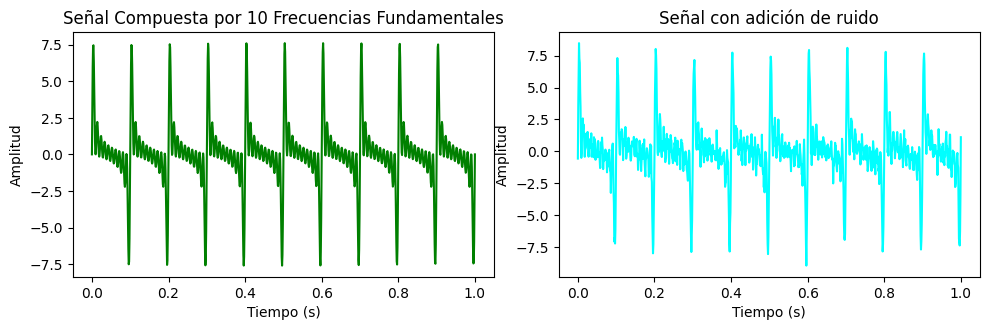

In [34]:
# Se genera un subplot para ambos gráficos
plt.figure(figsize=(10,6))

# Se realiza el gráfico de la señal sin ruido
plt.subplot(2,2,1)
plt.plot(t, sen, color='g')
plt.title('Señal Compuesta por 10 Frecuencias Fundamentales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')


# Se genera el gráfico de la señal con ruido
plt.subplot(2,2,2)
plt.plot(t,sen_1,color='cyan')
plt.title('Señal con adición de ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

## Calculo de FFT

Teniendo la señal con el ruido agregado se procede a realizar el calculo de transformada rápida de Fourier (FFT).

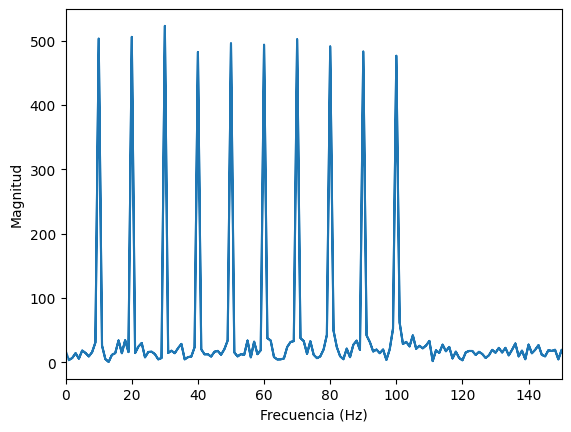

In [35]:
# Se importan la librería necesaria
from scipy.fft import fft, fftfreq, ifft
# Se realiza el calculo de la FFT para la señal
sen_1_fft= fft(sen_1)
freq_1= fftfreq(len(t), 1 / 1000)
fft_freq=np.abs(freq_1)

# Se realiza el gráfico de la FFT 
plt.plot(fft_freq,np.abs(sen_1_fft))
plt.xlim(0,150)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.show()


## Calculo IFFT

A partir del calculo de la trasformada de Fourier, se realiza el calculo de la inversa de esta función con el fin de reconstruir la señal en el dominio del tiempo.

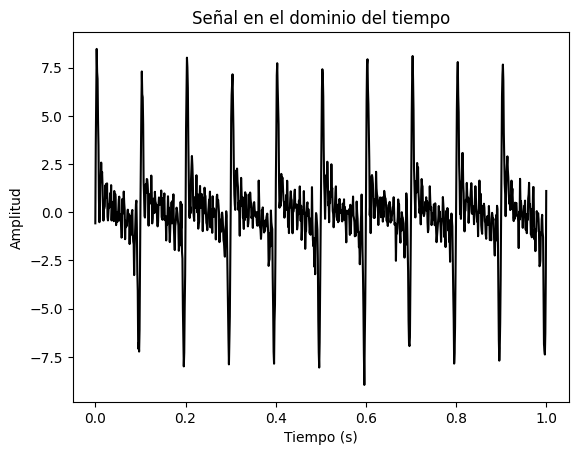

In [36]:
# Se realiza el calculo de inversa de la FFT
sen_ifft=ifft(sen_1_fft)

# Se genera el gráfico de la señal en el dominio del tiempo
plt.title("Señal en el dominio del tiempo")
plt.plot(t,sen_ifft,color='black')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()


Realizamos un gráfico donde se pueda observar la señal con el calculo de la IFFT con la señal original:

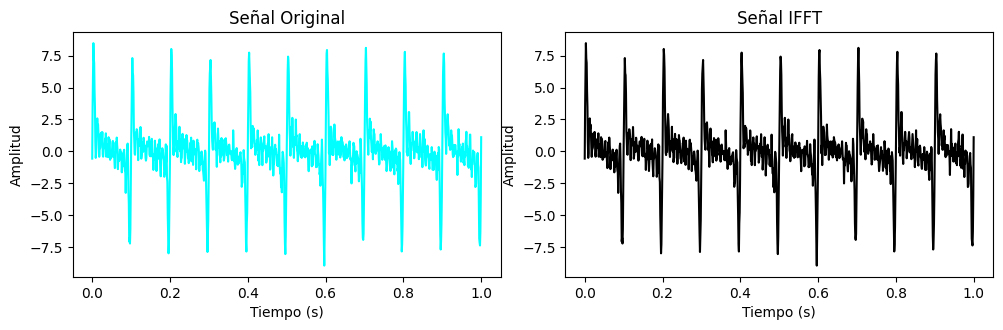

In [37]:
# Se genera un subplot para ambos gráficos
plt.figure(figsize=(10,6))

# Se realiza el gráfico de la señal sin ruido
plt.subplot(2,2,1)
plt.plot(t, sen_1, color='cyan')
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')


# Se genera el gráfico de la señal con ruido
plt.subplot(2,2,2)
plt.plot(t,sen_ifft,color='black')
plt.title('Señal IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

## Filtro de armónicos

Teniendo en cuenta la función en el dominio de la frecuencia (FFT), se aplicara un filtro para atenuar o eliminar los armónicos no deseados, esto se realizara por medio de una convolución con una función escalón.

-  La función escalón, es también conocida como función de Heaviside, es una función matemática que es cero para valores negativos y uno para valores positivos.

- Debido a que en el dominio de la frecuencia la convolución se convierte en una multiplicación, la aplicación del filtro se realizara multiplicando la FFT de la señal con la función escalón.

- Se realiza un filtro pasa bajas para frecuencias menores a 50 Hz.

- Una vez aplicado el filtro se realiza el calculo de la ifft para obtener la señal filtrada en el dominio del tiempo.


Creamos una función llamada Heaviside la cual representara nuestra función escalón:


In [38]:
# Se define la función escalón
def Heaviside(t,f):
    """
    Genera una función escalón de Heaviside modificada para un vector de frecuencias.
    
    Args:
        t (array): vector de frecuencias
        f (int): frecuencia de corte

    Returns:
        array: Un array con valores de 1 donde los elementos de `t` son menores que `f`, y 0 en caso contrario.
    """
    return np.where(t<f,1,0)

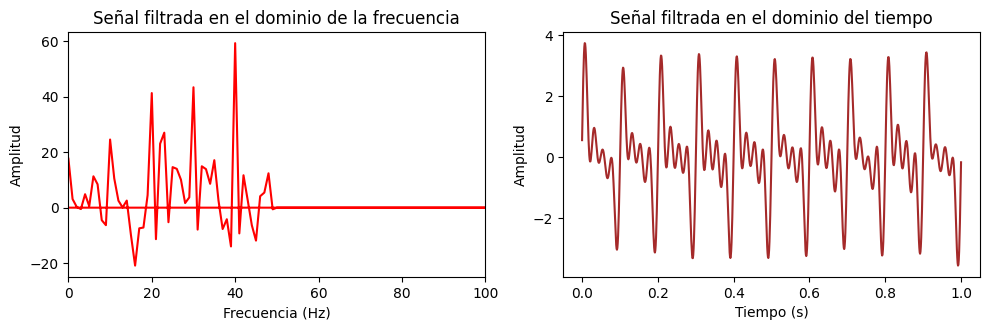

In [39]:
# Se define el filtro pasa bajas
umb= 50 # Umbral de corte
filtro_pb= Heaviside(fft_freq,50) # Se usa la función escalón para generar el filtro

# Se realiza la convolución
conv= sen_1_fft*filtro_pb
freq_conv=fftfreq(len(conv), 1 / 1000)

#Se calcula la ifft de la señal filtrada
ifft_conv= ifft(conv) 

# Se realiza el gráfico de la señal filtrada en el dominio de frecuencia y tiempo
plt.figure(figsize=(10, 6))

#Gráfico de la señal filtrada en el dominio de la frecuencia
plt.subplot(2,2,1)
plt.title("Señal filtrada en el dominio de la frecuencia")
plt.plot(freq_conv,conv,color="r")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0,100)

#Gráfico de la señal filtrada en el dominio del tiempo
plt.subplot(2,2,2)
plt.title("Señal filtrada en el dominio del tiempo")
plt.plot(t,ifft_conv,color="brown")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

Para visualizar tanto la señal filtrada como la señal original, realizamos los cuatros gráficos correspondientes para las señales en el dominio del tiempo y frecuencia, sin filtrar y con la aplicación del filtro, esto se realiza para observas las modificaciones realizadas al aplicar el filtro.

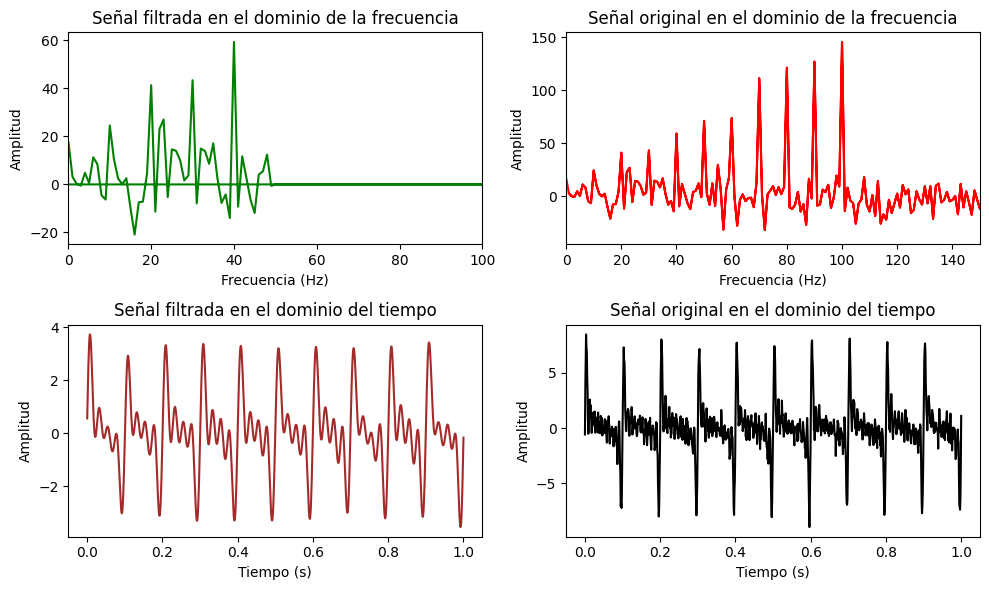

In [40]:
# Se realiza el gráfico de la señal filtrada y la señal original
plt.figure(figsize=(10, 6))

#Gráfico de la señal filtrada en el dominio de la frecuencia
plt.subplot(2,2,1)
plt.title("Señal filtrada en el dominio de la frecuencia")
plt.plot(freq_conv,conv,color="g")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0,100)

#Gráfico de la señal original en el dominio de la frecuencia
plt.subplot(2,2,2)
plt.title("Señal original en el dominio de la frecuencia")
plt.plot(fft_freq,sen_1_fft,color="r")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0,150)


#Gráfico de la señal filtrada en el dominio del tiempo
plt.subplot(2,2,3)
plt.title("Señal filtrada en el dominio del tiempo")
plt.plot(t,ifft_conv,color="brown")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

#Gráfico de la señal original en el dominio del tiempo
plt.subplot(2,2,4)
plt.title("Señal original en el dominio del tiempo")
plt.plot(t,sen_1,color="black")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")


plt.tight_layout()
plt.show()

# **Ecualizador**


El objetivo es modificar un código base que implementa un ecualizador de una sola banda para que soporte cinco bandas de frecuencia. El ecualizador debe permitir ajustar independientemente la ganancia de cada banda y visualizar gráficamente el comportamiento de la señal procesada.

In [41]:
# Se importan las librerías necesarias
from ipywidgets import interact
from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer

Se crea un filtro pasa-bandas (Butterworth), el cual permitirá pasar las frecuencias dentro de un rango especificado y atenúa las frecuencias fuera de este rango.

In [42]:
def filter_(signal, f0, f1, sample_rate):
    """
    Genera un filtro pasa banda para una señal de entrada a partir de las frecuencias de corte.
    Args:
        signal (_type_): señal de entrada
        f0 (float): frecuencia de corte inferior
        f1 (float): frecuencia de corte superior
        sample_rate (float): frecuencia de muestreo
    Returns:
        array: señal filtrada
    """
    # Se genera el filtro pasa banda
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    # Se aplica el filtro a la señal
    signal_filtered = f(signal)
    
    # Se retorna la señal filtrada
    return signal_filtered

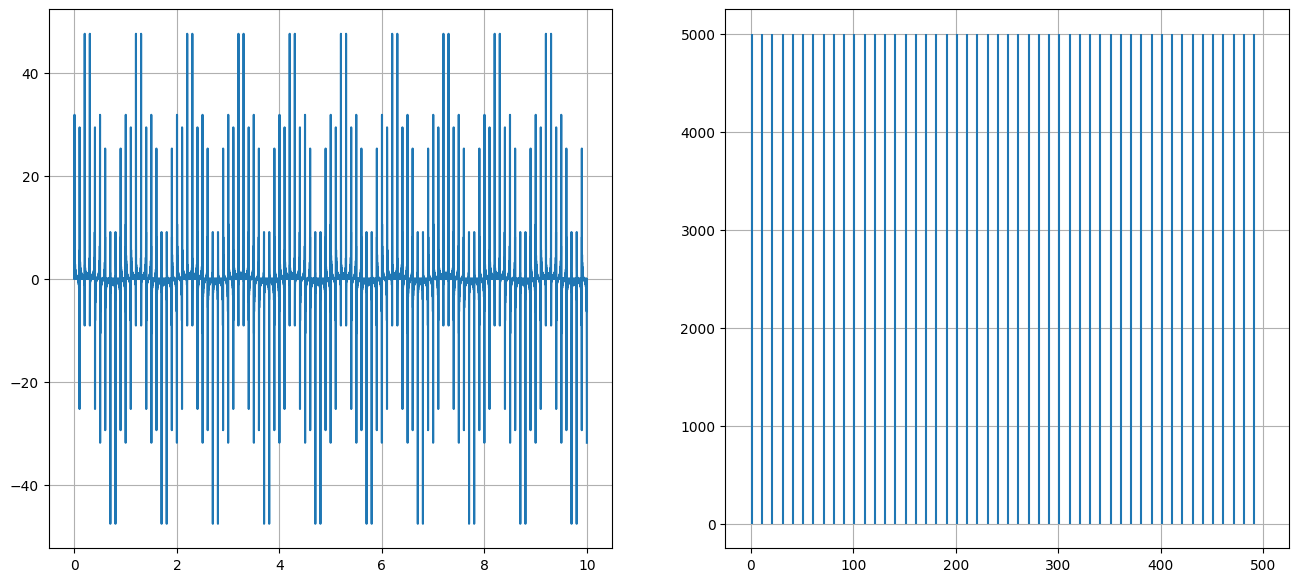

In [43]:
# Se crea la figura para el gráfico
vis = Visualizer(figsize=(16, 7), dpi=100)

# Se definen un vector de frecuencias
f = np.arange(1, 500, 10)

# Se aplica el filtro a la señal
generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)

# Se genera la señal
signal = np.sum(generador.sine_wave, axis=0)

# Se realiza el gráfico de la señal
vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

A partir de lo anterior se genera un ecualizador de una (1) banda

In [44]:
# Se crea el interactivo para el ecualizador
@interact(fc=(0, 500, 10), wb=(10, 250, 10), gain=(-10, 10, 1))
def equalizer(fc=100, wb=10, gain=0):
    f0 = fc-wb
    f1 = fc+wb
    sample_rate = generador.sampling_rate
        
    if f0<=0:
        f0 = 0.1
    if f1>=sample_rate/2:
        f1 = sample_rate/2 - 0.1

    signal_filtered = filter_(signal, f0, f1, sample_rate)

    signal_equalized = (signal - signal_filtered) + (signal_filtered*np.power(10, (gain / 20)))  
    
    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()

interactive(children=(IntSlider(value=100, description='fc', max=500, step=10), IntSlider(value=10, descriptio…

Teniendo en cuenta el código dado anteriormente, se generara un ecualizador de 5 bandas

In [45]:
# Se crea el interactivo para el ecualizador de 5 bandas
@interact(
    Fc1=(20, 500, 10), wb1=(10, 100, 10), gain1=(0, 100, 10),
    Fc2=(20, 500, 10), wb2=(10, 100, 10), gain2=(0, 100, 10),
    Fc3=(20, 500, 10), wb3=(10, 100, 10), gain3=(0, 100, 10),
    Fc4=(20, 500, 10), wb4=(10, 100, 10), gain4=(0, 100, 10),
    Fc5=(20, 500, 10), wb5=(10, 100, 10), gain5=(0, 100, 10),
)
# Se define la función para el ecualizador de 5 bandas
def equalizer_5_bands(Fc1=50, wb1=20, gain1=0,
                      Fc2=150, wb2=30, gain2=0,
                      Fc3=250, wb3=40, gain3=0,
                      Fc4=350, wb4=50, gain4=0,
                      Fc5=450, wb5=60, gain5=0):
    """
    Función para ecualizar una señal de entrada en 5 bandas.

    Args:
        Fc1 (int, optional): Frecuencia central banda 1. Default 50.
        wb1 (int, optional): Ancho de banda 1.
        gain1 (int, optional): Ganancia banda 1. Defaults to 0.
        
        Fc2 (int, optional): Frecuencia central banda 2. Defaults to 150.
        wb2 (int, optional): Ancho de banda 2. Defaults to 30.
        gain2 (int, optional): Ganancia banda 2. Defaults to 0.
        
        Fc3 (int, optional): Frecuencia central banda 3. Defaults to 250.
        wb3 (int, optional): Ancho de banda 3. Defaults to 40.
        gain3 (int, optional): Ganancia banda 3. Defaults to 0.
        
        Fc4 (int, optional): Frecuencia central banda 4. Defaults to 350.
        wb4 (int, optional): Ancho de banda 4. Defaults to 50.
        gain4 (int, optional): Ganancia banda 4. Defaults to 0.
        
        Fc5 (int, optional): Frecuencia central banda 5. Defaults to 450.
        wb5 (int, optional): Ancho de banda 5. Defaults to 60.
        gain5 (int, optional): Ganancia banda 5. Defaults to 0.
    """
    # Se obtiene la señal de entrada
    sample_rate_2 = generador.sampling_rate

    # Se define la función para aplicar el filtro a una banda
    def apply_band(signal, fc, wb, gain):
        """
        Aplica un filtro a una banda de la señal de entrada.
        
        Args:
            signal (array): señal de entrada
            fc (int): frecuencia central
            wb (int): ancho de banda
            gain (int): ganancia
            
        Returns:
            array: señal filtrada
        """
        f0 = max(0.1, fc - wb)
        f1 = min(sample_rate_2 / 2 - 0.1, fc + wb)
        signal_filtered = filter_(signal, f0, f1, sample_rate_2)
        return signal_filtered 

    # Aplicar los filtros a las 5 bandas
    band1 = apply_band(signal, Fc1, wb1, gain1)
    band2 = apply_band(signal, Fc2, wb2, gain2)
    band3 = apply_band(signal, Fc3, wb3, gain3)
    band4 = apply_band(signal, Fc4, wb4, gain4)
    band5 = apply_band(signal, Fc5, wb5, gain5)

    # Se obtiene el promedio de las bandas
    band= (band1 + band2 + band3 + band4 + band5)/5
    
    # Se obtiene el promedio de los ganancias
    gain= (gain1 + gain2 + gain3 + gain4 + gain5)/5
    
    # Se obtiene la señal ecualizada
    signal_equalized = (signal - band) + (band*np.power(10, (gain / 20)))  
    

    # Se gráfica la señal ecualizada
    vis.plot_dsp(signal_equalized, sample_rate=sample_rate_2, time=generador.time, ffn='vlines',color='red')
    plt.show()


interactive(children=(IntSlider(value=50, description='Fc1', max=500, min=20, step=10), IntSlider(value=20, de…

Se creo un ecualizador de 5 bandas, a partir de un código base en un donde se hacia uso de un ecualizador de una sola banda. Esto se realizo aplicando multiples filtros pasa-banda, donde cada banda tiene su propia frecuencia central, ancho de banda y ganancia, este ecualizador obtiene una amplia ventaja, debido a que, 5 bandas mejora significativamente la capacidad de manipular la señal teniendo en cuenta las características dadas anteriormente.